In [2]:
from sympy import init_session
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_styles import analytic
%matplotlib widget
import scipy as sp
init_session()

IPython console for SymPy 1.12 (Python 3.12.0-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



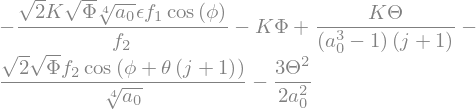

In [3]:
Th, th, Phi, phi, K, eps = symbols("Theta theta Phi phi K epsilon")
f1, f2, j, L = symbols("f_1 f_2 j L")
a0 = symbols("a_0")
Kp = K/(a0**3-1)/(j+1)
H = -Rational(3,2)/a0**2*Th**2 + Kp*Th - K*Phi - K*a0**Rational(1,4)*f1/f2*eps*sqrt(2*Phi)*cos(phi) - f2/a0**Rational(1,4)*sqrt(2*Phi)*cos((j+1)*th+phi)
H

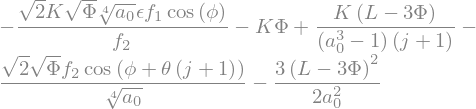

In [4]:
H.subs({Th:L-3*Phi})

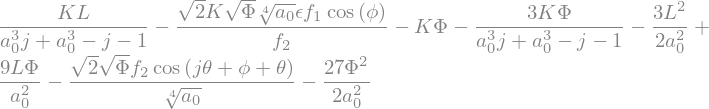

In [5]:
H.subs({Th:L-3*Phi}).expand(numer=True)

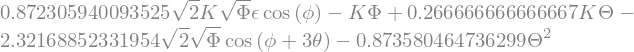

In [6]:
f1, f2 = -2.0252226899386, 2.48400518330394
j = 2
a0 = ((j+1)/j)**(2./3)
Th, th, Phi, phi, K, eps = symbols("Theta theta Phi phi K epsilon")
Kp = K/(a0**3-1)/(j+1)
H = -3/2/a0**2*Th**2 + Kp*Th - K*Phi - K*a0**0.25*f1/f2*eps*sqrt(2*Phi)*cos(phi) - f2/a0**0.25*sqrt(2*Phi)*cos((j+1)*th+phi)
H

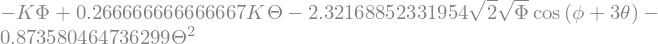

In [7]:
H1 = H.subs(eps,0)
H1

Let's consider intersections with the $X_\theta=0,Y_\theta>0$ plane

Let $L=\Theta+3\Phi$ be the conserved quantity that parameterizes the level curves

In [8]:
L = symbols("L")

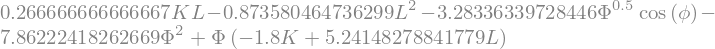

In [9]:
H1 = H1.subs(th,0).subs(Th,-3*Phi+L).expand().evalf().collect(Phi**2).collect(Phi)
H1

In [10]:
A = H1.coeff(Phi**0.5*cos(phi))
B = H1.coeff(Phi**2)
A, B

In [11]:
eta = (8*A/B)**(2./3)
eta

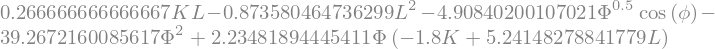

In [12]:
H1.subs(Phi,eta*Phi)

Get rid of constants and combine $\Phi$ terms, get $\delta$ as function of $L$ and $K$ (Henrard & Lemaitre '83)

I think need constant terms to relate to $E$ for the two critical argument Hamiltonian

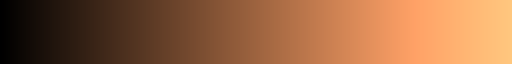

In [13]:
plt.cm.copper

# Plotting slice of $E$

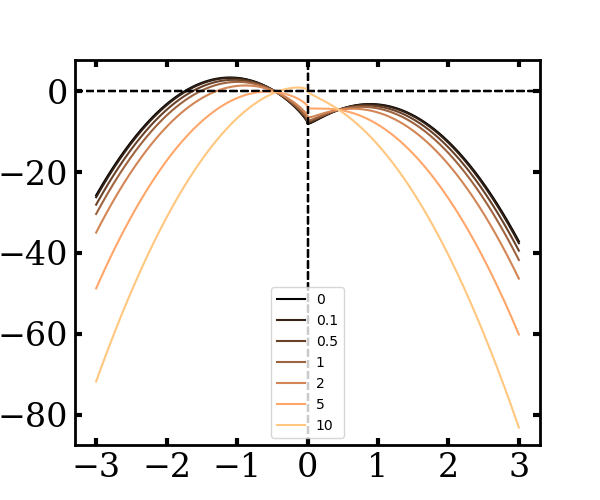

In [14]:
Lval = 3#1.26126126

H1func = lambdify([Phi,phi,K,L],H1)
Phivals = np.linspace(0,3,100000)
Kvals = [0,0.1,0.5,1,2,5,10]
colors = plt.cm.copper(np.linspace(0,1,len(Kvals)))
with mpl.rc_context(analytic):
    fig, ax = plt.subplots()

for ii, Kval in enumerate(Kvals):
    ax.plot(Phivals,H1func(Phivals,0,Kval,Lval),c=colors[ii])
    ax.plot(-Phivals,H1func(Phivals,np.pi,Kval,Lval),c=colors[ii],label=f"{Kval}")
    ax.axhline(y=0,c="k",ls="--")
    ax.axvline(x=0,c="k",ls="--")
ax.legend()

# Plotting level curves

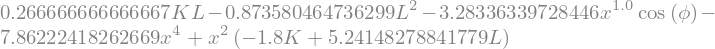

In [15]:
x = symbols("x",positive=True)
H1Kx = H1.subs(Phi,x**2).evalf()
H1Kx

In [16]:
H1Kx_4 = H1Kx.coeff(x**4)
H1Kx_4

In [17]:
H1Kx_3 = H1Kx.coeff(x**3)
H1Kx_3

In [18]:
H1Kx_2 = H1Kx.coeff(x**2)
H1Kx_2

In [19]:
H1Kx_1 = H1Kx.coeff(x**1.)
H1Kx_1

In [20]:
H1Kx_0 = H1Kx.subs(x,0)
H1Kx_0

In [21]:
p4 = np.float64(H1Kx_4)
p3 = np.float64(H1Kx_3)
p2 = lambdify([K, L], H1Kx_2, modules="numpy")
p1 = lambdify(phi, H1Kx_1, modules="numpy")
p0 = lambdify([K, L], H1Kx_0, modules="numpy")

At the separatrix, $K>0$ tends to push the particle deeper into resonance

(5000,)
(4998,)
(90,)
(92,)


/Users/jtlaune/micromamba/envs/Science/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/jtlaune/micromamba/envs/Science/lib/python3.12/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


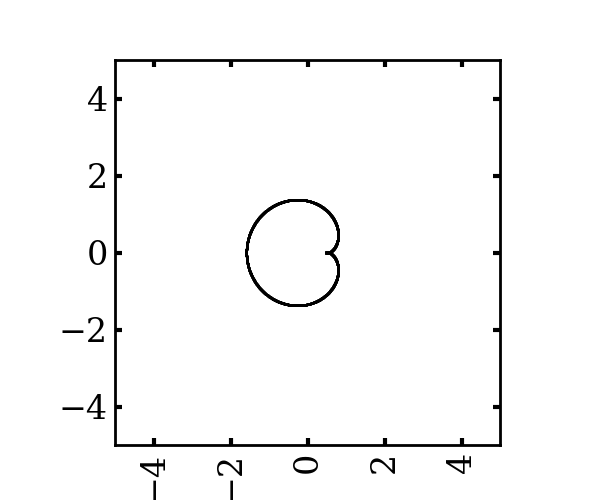

In [22]:
Lval = 1.26126126#4.58#
Kval = 0
Eval = -1.84653648#-4

phivals = np.linspace(0, 2 * np.pi, 10000)
xrts = np.zeros((4, len(phivals)), dtype=np.complex64)

for kk, phival in enumerate(phivals):
    pp = np.array(
        [p4, p3, p2(Kval, Lval), p1(phival), p0(Kval, Lval) - Eval],
        dtype=np.float64,
    )
    rts = np.roots(pp)
    for jj, rr in enumerate(rts):
        xrts[jj, kk] = rr

with mpl.rc_context(analytic):
    fig, ax = plt.subplots()
xrts.shape
for ii in range(4):
    xplt = xrts[ii, :]
    rls = np.logical_and(np.isreal(xplt), xplt > 0)
    print(xplt[rls].shape)
    ax.scatter(
        np.sqrt(2) * xplt[rls] * np.cos(phivals[rls]),
        np.sqrt(2) * xplt[rls] * np.sin(phivals[rls]),
        s=0.1, c="k"
    )
ax.set_aspect(1)
ax.set_ylim((-5,5))
ax.set_xlim((-5,5))
ax.tick_params(axis="x",rotation=90)

# Fixed points

In [23]:
-H1.diff(phi) # 

the unstable equilibrium will be at $\phi=0$ (why tho)

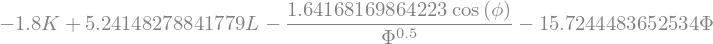

In [24]:
phidot_unstable = H1.diff(Phi)
phidot_unstable

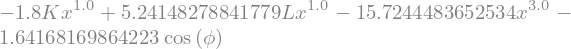

In [25]:
x = symbols("x",positive=True)
pdux = (phidot_unstable*Phi**0.5).expand().subs(Phi,x**2)
pdux

In [26]:
pdux_3 = pdux.coeff(x**3.0)
pdux_3

In [27]:
pdux_2 = pdux.coeff(x**2.0)
pdux_2

In [28]:
pdux_1 = pdux.coeff(x**1.0)
pdux_1

In [29]:
pdux_0 = pdux.subs(x,0)
pdux_0

In [30]:
p3 = np.float64(pdux_3)
p2 = np.float64(pdux_2)
p1 = lambdify([K, L], pdux_1, modules="numpy")
p0 = lambdify([phi], pdux_0, modules="numpy")

In [31]:
Kval = 0
Lval = 3

pp = np.array(
    [p3, p2, p1(Kval, Lval), p0(np.pi)],
    dtype=np.float64,
)
rts = np.roots(pp)
print(rts)
rls = np.isreal(rts)
if np.any(rls):
    if np.sum(rls*1)==3: 
        print(np.roots([p3, p2, p1(Kval, Lval), p0(0)]))
        print(True)

[ 1.04860107 -0.94302102 -0.10558005]
[-1.04860107  0.94302102  0.10558005]
True


## $E_{\rm sep}(L; K)$

In [32]:
Lvals = np.linspace(0,15,1000)
Kvals = np.linspace(0,30,1000)
Lsepvals = np.zeros(len(Kvals))
sqrtPhisepvals = np.zeros(len(Kvals))
for ii, Kval in enumerate(Kvals):
    print(ii / len(Kvals), end="\r")
    iter_pass = False
    for jj, Lval in enumerate(Lvals):
        if iter_pass: break
        else:
            pp = np.array(
                [p3, p2, p1(Kval, Lval), p0(0)],
                dtype=np.float64,
            )
            rts = np.roots(pp)
            rls = np.isreal(rts)
            if np.any(rls):
                if np.sum(rls*1)==3: 
                    Lsepvals[ii] = Lval
                    #print(Lval)
                    #print(rts[rts[rls]>=0])
                    sqrtPhisepvals[ii] = np.max(rts[rts[rls]>=0])
                    iter_pass = True 

In [33]:
Lsepvals

array([ 1.26126126,  1.27627628,  1.29129129,  1.29129129,  1.30630631,
        1.32132132,  1.32132132,  1.33633634,  1.35135135,  1.35135135,
        1.36636637,  1.38138138,  1.38138138,  1.3963964 ,  1.41141141,
        1.42642643,  1.42642643,  1.44144144,  1.45645646,  1.45645646,
        1.47147147,  1.48648649,  1.48648649,  1.5015015 ,  1.51651652,
        1.51651652,  1.53153153,  1.54654655,  1.54654655,  1.56156156,
        1.57657658,  1.59159159,  1.59159159,  1.60660661,  1.62162162,
        1.62162162,  1.63663664,  1.65165165,  1.65165165,  1.66666667,
        1.68168168,  1.68168168,  1.6966967 ,  1.71171171,  1.71171171,
        1.72672673,  1.74174174,  1.75675676,  1.75675676,  1.77177177,
        1.78678679,  1.78678679,  1.8018018 ,  1.81681682,  1.81681682,
        1.83183183,  1.84684685,  1.84684685,  1.86186186,  1.87687688,
        1.87687688,  1.89189189,  1.90690691,  1.90690691,  1.92192192,
        1.93693694,  1.95195195,  1.95195195,  1.96696697,  1.98

In [34]:
Esepfunc = H1.subs(phi,0)
Esepfunc = lambdify([Phi,K,L],Esepfunc)
Esepvals = Esepfunc(sqrtPhisepvals**2,Kvals,Lsepvals)
Esepvals

array([ -1.84653648,  -1.86563403,  -1.88470648,  -1.88321778,
        -1.90254274,  -1.92183316,  -1.9200215 ,  -1.9395773 ,
        -1.95908692,  -1.95694591,  -1.97673732,  -1.99646758,
        -1.99398769,  -2.01402234,  -2.03397495,  -2.05391164,
        -2.0514318 ,  -2.07160878,  -2.09176217,  -2.08896494,
        -2.10936883,  -2.12973998,  -2.12662074,  -2.14725477,
        -2.1678449 ,  -2.1643976 ,  -2.18526626,  -2.20607675,
        -2.20229266,  -2.22340283,  -2.24443535,  -2.2654532 ,
        -2.26166396,  -2.28292046,  -2.30415482,  -2.30004891,
        -2.32153182,  -2.34298375,  -2.33855673,  -2.36026915,
        -2.38193982,  -2.37718597,  -2.39913208,  -2.42102286,
        -2.41593408,  -2.43812019,  -2.46023268,  -2.48233171,
        -2.47723296,  -2.49956905,  -2.52188443,  -2.5164697 ,
        -2.53903173,  -2.56156447,  -2.5558295 ,  -2.57862043,
        -2.60137169,  -2.59531103,  -2.6183348 ,  -2.64130591,
        -2.63491203,  -2.65817443,  -2.68136694,  -2.67

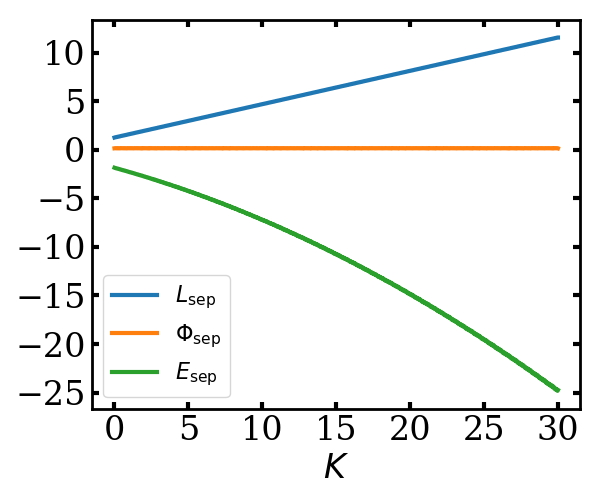

In [35]:
with mpl.rc_context(analytic): fig, ax = plt.subplots()
ax.plot(Kvals,Lsepvals,lw=3,label=r"$L_{\rm sep}$")
ax.plot(Kvals,sqrtPhisepvals**2,lw=3,label=r"$\Phi_{\rm sep}$")
ax.plot(Kvals,Esepvals,lw=3,label=r"$E_{\rm sep}$")
ax.legend(fontsize=16,loc="lower left")
#ax.set_xlim((0,15))
#ax.set_ylim((-4,2))
ax.set_xlabel(r"$K$")
fig.tight_layout()

# $L_{\rm min}(E;K)$

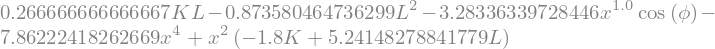

In [36]:
x = symbols("x",positive=True)
H1Kx = H1.subs(Phi,x**2).evalf()
H1Kx

In [37]:
H1Kx_4 = H1Kx.coeff(x**4)
H1Kx_4

In [38]:
H1Kx_3 = H1Kx.coeff(x**3)
H1Kx_3

In [39]:
H1Kx_2 = H1Kx.coeff(x**2)
H1Kx_2

In [40]:
H1Kx_1 = H1Kx.coeff(x**1.)
H1Kx_1

In [41]:
H1Kx_0 = H1Kx.subs(x,0)
H1Kx_0

In [42]:
p4 = np.float64(H1Kx_4)
p3 = np.float64(H1Kx_3)
p2 = lambdify([K, L], H1Kx_2, modules="numpy")
p1 = lambdify(phi, H1Kx_1, modules="numpy")
p0 = lambdify([K, L], H1Kx_0, modules="numpy")

In [43]:
Kval = 10
Lval = 100
Eval = 5
phivals = np.linspace(0, 2 * np.pi, 100)
for kk, phival in enumerate(phivals):
    pp = np.array(
        [p4, p3, p2(Kval, Lval), p1(phival), p0(Kval, Lval) - Eval],
        dtype=np.float64,
    )
    rts = np.roots(pp)
    rls = np.isreal(rts)
    if np.any(rls):
        if np.any(rts[rls]>=0): 
            print(True)
            break

In [44]:
def compute_Lmax(Kval):
    phivals = np.linspace(0, 2 * np.pi, 100)
    # have to go up from negative
    Lvals = np.linspace(-10, 10, 1000)
    Evals = np.linspace(-10, 5, 100)
    maxLvals = np.zeros(len(Evals))
    for ii, Eval in enumerate(Evals):
        print(ii / len(Evals), end="\r")
        iter_pass = False
        for jj, Lval in enumerate(Lvals):
            if iter_pass: break
            else:
                for kk, phival in enumerate(phivals):
                    if iter_pass: break
                    else:
                        pp = np.array(
                            [p4, p3, p2(Kval, Lval), p1(phival), p0(Kval, Lval) - Eval],
                            dtype=np.float64,
                        )
                        rts = np.roots(pp)
                        rls = np.isreal(rts)
                        if np.any(rls):
                            if np.any(rts[rls]>=0):
                                maxLvals[ii] = Lval
                                iter_pass = True 
    return(Kval,Evals,maxLvals)

In [45]:
from loky import get_reusable_executor
executors_solve_ivp = get_reusable_executor(max_workers=8)
import dill as pickle

In [46]:
Kvals = [0,0.1,0.5,1,1.5,2,5,10]
results = list(executors_solve_ivp.map(compute_Lmax, Kvals))

In [47]:
with open(f"Lmin.pkl", "wb") as f:
    pickle.dump(results,f)

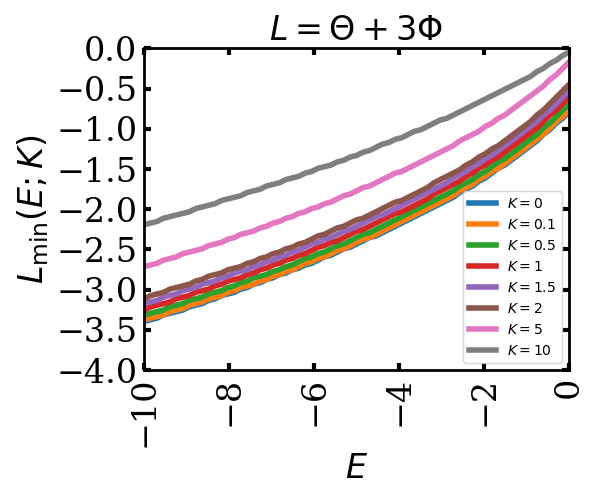

In [48]:
with mpl.rc_context(analytic): fig, ax = plt.subplots()
for result in results:
    ax.plot(result[1],result[2],lw=4,label=f"$K={result[0]}$")
ax.set_ylabel(r"$L_{\rm min}(E; K)$")
ax.set_xlabel(r"$E$")
ax.tick_params(axis="x",rotation=90)
ax.set_title(r"$L=\Theta+3\Phi$",fontsize=24)
ax.legend()
ax.set_xlim((-10,0))
ax.set_ylim((-4,0))
fig.tight_layout()

# Dissipative equilibrium values

In [49]:
a, e, g, ep = symbols("a e g e_p",positive=True)
Th_ae = sqrt(a) - sqrt(a0)
Th_ae

here $g=\omega_{p,\rm ext}t-\varpi$

In [50]:
X1_aeg = sqrt(2)*a**Rational(1,4)*e*sin(g)
X1_aeg

In [51]:
Y1_aeg = sqrt(2)*a**Rational(1,4)*e*cos(g) + a0**0.25*f1*ep/f2
Y1_aeg

In [52]:
Phi_aeg = 0.5*(X1_aeg**2+Y1_aeg**2).expand().trigsimp()
Phi_aeg

We're going to assume $\left<\cos(\omega_{p,\rm ext}t-\varpi)\right>_t=0$

In [53]:
Phi_ae = Phi_aeg.subs(g,pi/2)
Phi_ae

We'll assume $\phi\to\pi$ in dissipative equilibrium

In [54]:
L_ae = Th_ae + 3*Phi_ae
L_ae

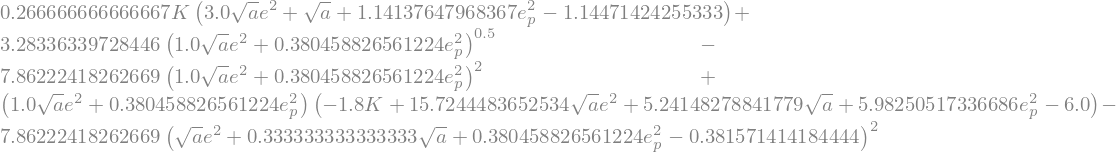

In [55]:
H1.subs({phi:pi,Phi:Phi_ae,L:L_ae})

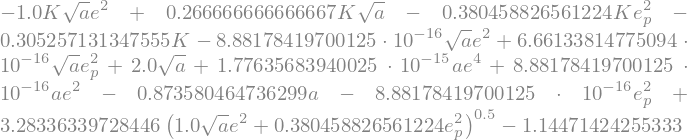

In [56]:
E_ae = H1.subs({phi:pi,Phi:Phi_ae,L:L_ae}).expand()
E_ae

Introduce the dissipative timescales

In [57]:
Tm, Te = symbols("T_m T_e",positive=True)

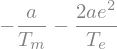

In [58]:
da_dis = -a/Tm - 2*e**2*a/Te
da_dis

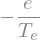

In [59]:
de_dis = -e/Te
de_dis

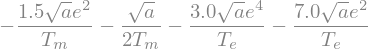

In [60]:
dL_dis = (L_ae.diff(a)*da_dis+L_ae.diff(e)*de_dis).expand()
dL_dis

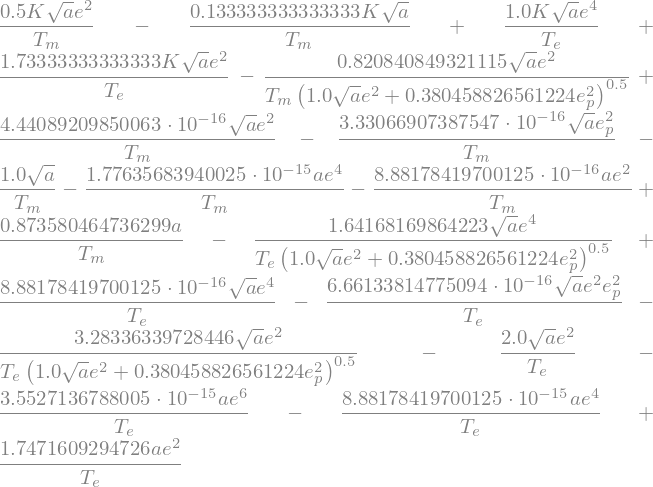

In [61]:
dE_dis = (E_ae.diff(a)*da_dis+E_ae.diff(e)*de_dis).expand()
dE_dis

In [62]:
Kval = 0
epval = 0
Teval = 1e3 * 2 * np.pi
Tmval = 1e6 * 2 * np.pi
dL_func = (dL_dis*Te).subs({Tm: Tmval, Te: Teval, ep: epval, K: Kval})
dE_func = (dE_dis*Te).subs({Tm: Tmval, Te: Teval, ep: epval, K: Kval})
dis_func = lambdify([a, e], [dL_func, dE_func])

In [63]:
dL_func

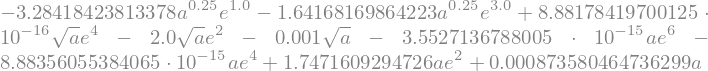

In [64]:
dE_func

In [65]:
def f(x):
    aval, eval = x[0], x[1]
    return np.array(dis_func(aval, eval), dtype=np.float64)

f([a0, 0.1])

array([-0.08106294, -0.35313566])

In [66]:
root = sp.optimize.fsolve(f,[a0,0.2],xtol=1e-16,epsfcn=1e-16)
root

<lambdifygenerated-11>:2: RuntimeWarning: invalid value encountered in sqrt
  return [-3.0*sqrt(a)*e**4 - 7.0015*sqrt(a)*e**2 - 0.0005*sqrt(a), -3.28418423813378*a**0.25*e**1.0 - 1.64168169864223*a**0.25*e**3.0 + 8.88178419700125e-16*sqrt(a)*e**4 - 2.0*sqrt(a)*e**2 - 0.001*sqrt(a) - 3.5527136788005e-15*a*e**6 - 8.88356055384065e-15*a*e**4 + 1.7471609294726*a*e**2 + 0.000873580464736299*a]
<lambdifygenerated-11>:2: RuntimeWarning: invalid value encountered in scalar power
  return [-3.0*sqrt(a)*e**4 - 7.0015*sqrt(a)*e**2 - 0.0005*sqrt(a), -3.28418423813378*a**0.25*e**1.0 - 1.64168169864223*a**0.25*e**3.0 + 8.88178419700125e-16*sqrt(a)*e**4 - 2.0*sqrt(a)*e**2 - 0.001*sqrt(a) - 3.5527136788005e-15*a*e**6 - 8.88356055384065e-15*a*e**4 + 1.7471609294726*a*e**2 + 0.000873580464736299*a]
/Users/jtlaune/micromamba/envs/Science/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the las

array([ 0.02033859, -0.0001197 ])

In [67]:
f(root)

array([-7.13210170e-05,  2.36075296e-05])

In [68]:
f1